In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

## Problem 0: The Logistic Map.

The logistic map is given by
$$x_{n+1} = rx_n - rx_n^2$$
One can generate a time series from the Logistic map given an initial value and by fixing the parameter r. We take $x_0$ = 0.5 and r = 3.7 and generate an array of 100 values.

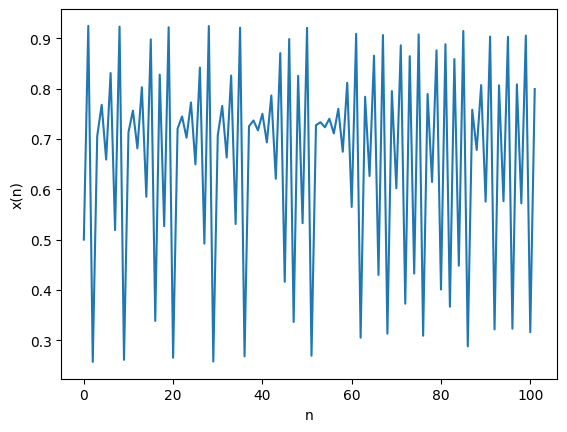

In [2]:
r = 3.7
x = np.zeros(102)
x[0] = 0.5
for i in range(1, 102):
    x[i] = r*x[i-1]*(1-x[i-1])

plt.plot(x)
plt.xlabel("n")
plt.ylabel("x(n)")
plt.show()

Using this found time series, we could shift our data by a step of 1 defining $x_{n+1}$ and cut the last element from the data defining $x_n$.<br>
To apply linear regression, we treat $x_n$ as our input and use it in constructing the feature vector and treat $x_{n+1}$ as our output.

In [3]:
xn = x[0:len(x) - 1]
xn1 = x[1:len(x)]
phi =  np.array([xn, xn**2]).T
lr = LinearRegression()
fit = lr.fit(phi, xn1)
coef = lr.coef_
print(coef)

[ 3.7 -3.7]


The coefficient to be found were (r, -r) and linear regression returned the coefficient vector [3.7, -3.7] giving us r = 3.7.

I will now try using PySRRegressor function:<br>
Taking the binary operators to be (+, -) and definig the loss to be the square loss of the form
$$(\text{prediction} - \text{target})^2$$
And performing a 100 iterations.

In [16]:
from pysr import PySRRegressor

model = PySRRegressor(

    niterations=100, 
    binary_operators=["-", "*"],
    unary_operators= [],
    elementwise_loss="loss(prediction, target) = (prediction - target)^2",
)

model.fit(xn.reshape(-1,1), xn1)
print(model)

c:\Users\USAID\AppData\Local\Programs\Python\Python311\Lib\site-packages\pysr\sr.py:1297: UserWarning: Note: it looks like you are running in Jupyter. The progress bar will be turned off.
  warnings.warn(
[ Info: Started!



Expressions evaluated per second: 2.410e+05
Head worker occupation: 20.7%. This is high, and will prevent efficient resource usage. Increase `ncyclesperiteration` to reduce load on head worker.
Progress: 557 / 1500 total iterations (37.133%)
Hall of Fame:
---------------------------------------------------------------------------------------------------
Complexity  Loss       Score     Equation
1           4.301e-02  1.594e+01  y = 0.66653
3           2.237e-02  3.270e-01  y = (1.3301 - x₀)
5           1.944e-02  7.008e-02  y = ((x₀ * -0.73955) - -1.1573)
7           7.545e-15  7.971e+00  y = ((x₀ - (x₀ * x₀)) * 3.7)
9           4.652e-15  2.418e-01  y = (((x₀ - (x₀ * x₀)) * 3.7) - 4.1327e-08)
---------------------------------------------------------------------------------------------------
Press 'q' and then <enter> to stop execution early.

Expressions evaluated per second: 2.440e+05
Head worker occupation: 17.8%
Progress: 1133 / 1500 total iterations (75.533%)
Hall of Fame:
------

The 7th and 9th output expressions were given by
$$y = ((x₀ - (x₀ * x₀)) * 3.7)$$
$$y = (((x₀ - (x₀ * x₀)) * 3.7) - 4.1327\times 10^{-8})$$
Where $x₀$ is the $x_n$ input. The symbolic regression function returned an expression that has the exact form of the differential equation (the 7th) and an expression that is close by a factor of  - $4.1327\times 10^{-8}$ (the 9th), giving us the coefficients (3.7, -3.7) corresponding to ($x_n, x_n^2$).